In [1]:
import cv2

In [2]:
#conda install -c conda-forge opencv

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [6]:
car1 = mpimg.imread("car1.jpeg")

In [7]:
car1.shape

(168, 300, 3)

In [5]:
type(car1)

numpy.ndarray

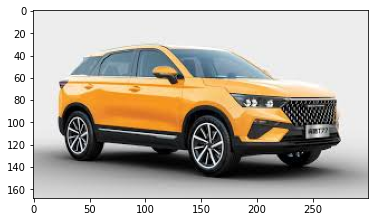

In [4]:
plt.imshow(car1)

In [8]:
car1_cv2 = cv2.imread("car1.jpeg")

In [8]:
cv2.imshow("image", car1_cv2)

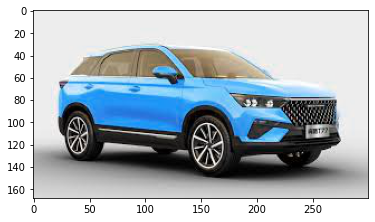

In [9]:
plt.imshow(car1_cv2)

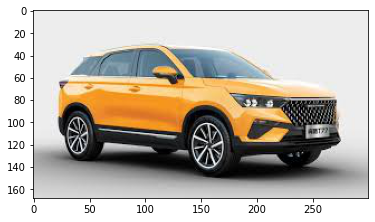

In [10]:
car1_cv2_BGR_RGB = cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2RGB)
plt.imshow(car1_cv2_BGR_RGB)

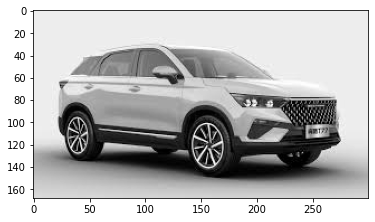

In [11]:
car1_cv2_BGR_GRAY = cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2GRAY)
plt.imshow(car1_cv2_BGR_GRAY, cmap="gray")

In [12]:
car1_cv2_BGR_GRAY.shape

(168, 300)

In [13]:
car1_cv2_BGR_GRAY.min()

0

In [14]:
car1_cv2_BGR_GRAY.max()

255

In [15]:
# saving the image
cv2.imwrite("car_grayscale.jpeg",car1_cv2_BGR_GRAY )

True

# understanding composition of colored image

In [22]:
def visualize_RGB_channels(imgArray=None, fig_size=(10,7)):
    # spliting the RGB component
    B, G, R=cv2.split(imgArray)
    # zero matrix
    Z=np.zeros(B.shape, dtype=B.dtype)
    # init subplots
    fig, ax=plt.subplots(2,2, figsize=fig_size)
    #[axi.set_axis_off() for axi in ax.ravel()]
    ax[0,0].set_title("original image")
    ax[0,0].imshow(cv2.merge((R,G,B)))
    
    ax[0,1].set_title("Red Image")
    ax[0,1].imshow(cv2.merge((R, Z,Z)))
    
    ax[1,0].set_title("Green Image")
    ax[1,0].imshow(cv2.merge((Z, G,Z)))
    
    ax[1,1].set_title("Blue Image")
    ax[1,1].imshow(cv2.merge((Z,Z,B)))

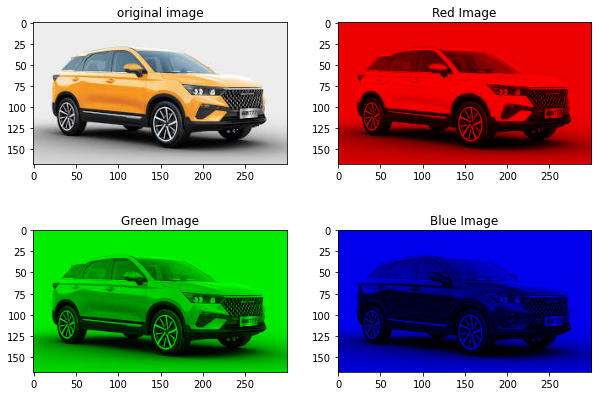

In [23]:
visualize_RGB_channels(imgArray=car1_cv2)